# Assignment 2: Python experience

In [123]:
import numpy as np
import pandas as pd
np.random.seed(1234) #set seed to ensure consistent results 

a) CREATE VECTOR X

In [124]:
mu, sigma = 0, 1 # mean and standard deviation
x = np.random.normal(mu, sigma, 100)
print(mu, sigma)


0 1


b) CREATE VECTOR eps

In [125]:
mu1 = 0
sigma1 = np.sqrt(0.25) # 0.5
eps = np.random.normal(mu1, sigma1, 100)
print(mu1, sigma1)

0 0.5


c) GENERATE VECOTR Y ACCORDING TO 

Y = -1 + 0.5 X + eps

where -1 and 0.5 correspond to the b0 and b1 coefficients respectively. 

In [126]:
b0 = -1
b1 = 0.5

y = b0 + b1*x + eps

print('Lenght of vector y:', len(y)) 
# as expected since the regression is made over 100 observations. 


Lenght of vector y: 100


d) Scatterplot displaying the relationship between X and y

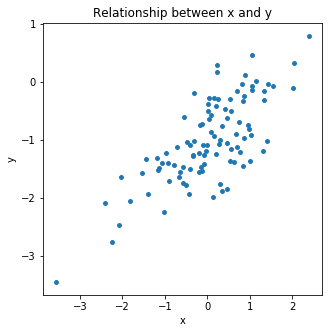

In [127]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(5,5))
plt.scatter(x,y,s=15)
plt.title('Relationship between x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()



The plot shows the 100 observations of X and Y plotted as a scatterplot. 
Each point corresponds to an observation with coordinates (x_i,y_i) for the i-th point. In general the observations seem to follow an "uphill" pattern which suggests a positive relationship between X and Y. 

e) FIT A LEAST SQUARES LINEAR MODEL


Predicted b0: -1.026506385858171 compared to -1
Predicted b1: [0.54070724] compared to 0.5


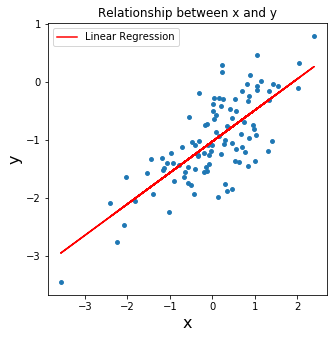

Coefficient of determination for Linear Regression: 0.5493701391253949
RMSE for Linear Regression=> 0.48759758514378454


In [128]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(x.reshape(-1,1),y)

# how it performs

y_pred=lm.predict(x.reshape(-1,1))

print('Predicted b0:', lm.intercept_, 'compared to', b0)
print('Predicted b1:', lm.coef_, 'compared to', b1)


# plotting predictions
plt.figure(figsize=(5,5))
plt.scatter(x,y,s=15)
plt.plot(x,y_pred,color='r',label='Linear Regression')
plt.title('Relationship between x and y')
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.legend()
plt.show()


from sklearn.metrics import r2_score
r_sq = r2_score(y, y_pred) #Compute the R2 statistics
print('Coefficient of determination for Linear Regression:', r_sq)

from sklearn.metrics import mean_squared_error
print('RMSE for Linear Regression=>',np.sqrt(mean_squared_error(y,y_pred)))


In [129]:
r2_score(y, y_pred)

0.5493701391253949

f) Fit polynomial regression using x and x^2 (i.e. 2nd degree) 

Display the curve on the scatterplot 

Evidence quadratic term improves the model fit?

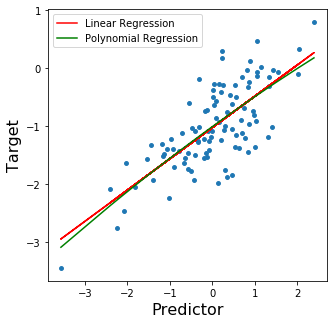

Coefficient of determination: -0.7182974965188058
RMSE for Polynomial Regression=> 0.9521398484050775


In [130]:
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x.reshape(-1,1),y.reshape(-1,1))

poly_pred=pipe.predict(x.reshape(-1,1))

#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)

#plotting predictions
plt.figure(figsize=(5,5))
plt.scatter(x,y,s=15)
plt.plot(x,y_pred,color='r',label='Linear Regression')
plt.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.legend()
plt.show()


r_sq_poly = r2_score(y, poly_pred) #Compute the R2 statistics
print('Coefficient of determination:', r_sq_poly)

print('RMSE for Polynomial Regression=>',np.sqrt(mean_squared_error(y,poly_pred)))



In [131]:
r2_score(y, poly_pred)

-0.7182974965188058

In [132]:
print('Coefficient of determination lm:', r_sq)
print('Coefficient of determination polym:', r_sq_poly)

Coefficient of determination lm: 0.5493701391253949
Coefficient of determination polym: -0.7182974965188058


g) Repeat (a) to (f) with model y s.t. 

y = -1 +0.5X + X^2 + eps 

Note: The regression line will be named as y_2 in order to differentiate it with the previous model.

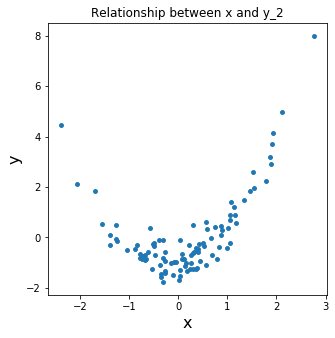

In [133]:
# create vector x
mu, sigma = 0, 1 # mean and standard deviation
x = np.random.normal(mu, sigma, 100)
# create vector eps 
mu1 = 0
sigma1 = np.sqrt(0.25) # 0.5
eps = np.random.normal(mu1, sigma1, 100)

# use x and eps to generate y (same length as x)
b0_2 = -1
b1_2 = 0.5
b2_2 = 1

y_2 = b0_2 + b1_2*x + b2_2*x**2 + eps

# Create scatter plot  displaying relationship between x and y
# Plot
plt.figure(figsize=(5,5))
plt.scatter(x,y_2,s=15)
plt.title('Relationship between x and y_2')
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.show()

Predicted b0: [-0.07718536] compared to -1
Predicted b1: [[0.7535994]] compared to 0.5 and 1


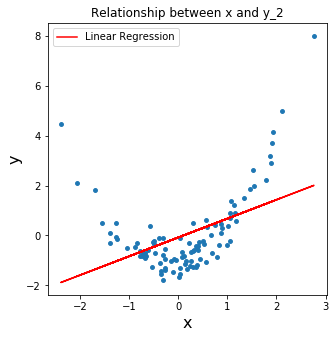

Coefficient of determination for Linear Regression: 0.20247784832070836
RMSE for Linear Regression=> 1.447091903577612


In [134]:
# fit linear regression to predict y using x
lm=LinearRegression()
lm.fit(x.reshape(-1,1),y_2.reshape(-1,1))

# how it performs

y_pred2=lm.predict(x.reshape(-1,1))

print('Predicted b0:', lm.intercept_, 'compared to', b0_2)
print('Predicted b1:', lm.coef_, 'compared to', b1_2, 'and', b2_2)



# display least squares line
plt.figure(figsize=(5,5))
plt.scatter(x,y_2,s=15)
plt.plot(x,y_pred2,color='r',label='Linear Regression')
plt.title('Relationship between x and y_2')
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.legend()
plt.show()


from sklearn.metrics import r2_score
r_sq2 = r2_score(y_2, y_pred2) #Compute the R2 statistics
print('Coefficient of determination for Linear Regression:', r_sq2)

from sklearn.metrics import mean_squared_error
print('RMSE for Linear Regression=>',np.sqrt(mean_squared_error(y,y_pred2)))

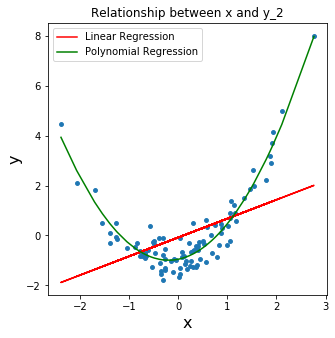

Coefficient of determination Poly: 0.9116997189096664
RMSE for Polynomial Regression=> 2.2840285306675985


In [135]:
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x.reshape(-1,1),y_2.reshape(-1,1))

poly_pred=pipe.predict(x.reshape(-1,1))

#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(x,poly_pred))
x_poly2, poly_pred2 = zip(*sorted_zip)


#plotting predictions
plt.figure(figsize=(5,5))
plt.scatter(x,y_2,s=15)
plt.plot(x,y_pred2,color='r',label='Linear Regression')
plt.plot(x_poly2,poly_pred2,color='g',label='Polynomial Regression')
plt.title('Relationship between x and y_2')
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.legend()
plt.show()


r_sq_poly2 = r2_score(y_2, poly_pred) #Compute the R2 statistics
print('Coefficient of determination Poly:', r_sq_poly2)

print('RMSE for Polynomial Regression=>',np.sqrt(mean_squared_error(y_2,poly_pred2)))



EXTRA: REPEAT THE SAME BY FITTING A LASSO 